<a href="https://colab.research.google.com/github/kiruheh/task/blob/main/task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import cv2
import numpy as np
from PIL import Image, ImageFilter, ImageDraw


In [44]:
def crop_circle(img, centers, radiuses):
    masks = []
    for i, center in enumerate(centers):
      radius = radiuses[i]
      mask = Image.new("L", img.size, 0)
      draw = ImageDraw.Draw(mask)
      draw.ellipse((center[0]-radius, center[1]-radius, center[0]+radius, center[1]+radius), fill=255)
      masks.append(mask)

      center = centers[1]
      radius = radiuses[1]
      mask2 = Image.new("L", img.size, 0)
      draw2 = ImageDraw.Draw(mask2)
      draw.ellipse((center[0]-radius, center[1]-radius, center[0]+radius, center[1]+radius), fill=255)

      result = Image.new("RGBA", img.size)
      for mask in masks:
        result.paste(img, (0, 0), mask)


    return result


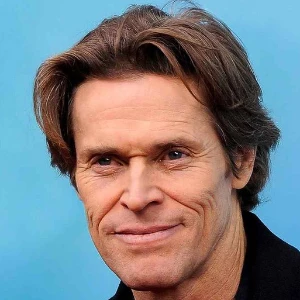

In [45]:
frame = Image.open("/content/images/5ccef96e40e07.webp")
np_frame = np.asarray(frame)
frame

In [46]:
gray_img = cv2.cvtColor(np_frame, cv2.COLOR_BGR2GRAY)

haar_cascade = cv2.CascadeClassifier('/content/haar/haarcascade_frontalface_default.xml')
haar_eyes_cascade = cv2.CascadeClassifier('/content/haar/haarcascade_eye.xml')

faces_rect = haar_cascade.detectMultiScale(gray_img)
eyes_rect = haar_eyes_cascade.detectMultiScale(gray_img)

for (x, y, w, h) in faces_rect:

    cv2.ellipse(np_frame, (x + w//2, y + h//2), (w//2, h//2), 0,0,360, (255, 255, 0), 2)


for (x, y, w, h) in eyes_rect:

    cv2.ellipse(np_frame, (x + w//2, y + h//2), (w//2, h//2), 0,0,360, (0, 255, 0), 2)





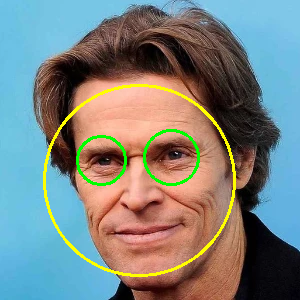

In [47]:
im = Image.fromarray(np_frame)

im

In [48]:
x1, y1, w1, h1 = eyes_rect[0]
x2, y2, w2, h2 = eyes_rect[1]

centers = ((x1 + w1//2, y1 + h1//2
            ), (x2 + w2//2,  + y2 + h2//2))
radiuses = ((w1//2, w2//2))
eyes = crop_circle(frame, centers, radiuses)

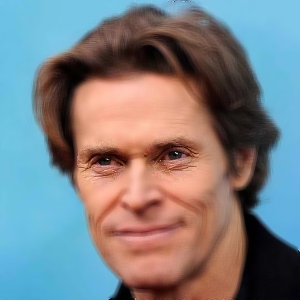

In [49]:
blure = frame.filter(ImageFilter.BLUR)
blure.paste(eyes,mask=eyes)
blure

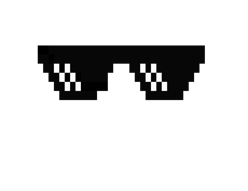

In [50]:
gl = Image.open('/content/pngegg.png').resize((int(faces_rect[0][2]*1.3), faces_rect[0][2]))
gl

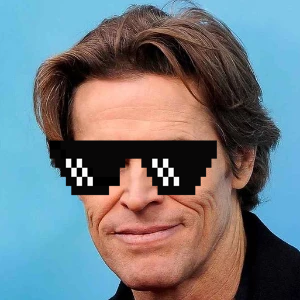

In [51]:
frame = Image.open("/content/images/5ccef96e40e07.webp")

x = (centers[0][0] + centers[1][0])//2
y = (centers[0][1] + centers[1][1])//2

frame.paste(gl, (x - gl.size[0]//2, y - gl.size[1]//3), mask=gl)
frame